In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Text, Layout, Output, IntText
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from eval import evaluate

In [6]:
o = Output()
o

Output()

In [7]:
def colocation(k, rhe, l, r, N):
    h = (r - l) / N
    taus = [l + h / 2 + h * i for i in range(N)]
    global_ys = []
    global_cs = []
    for i in range(N):
        cs = []
        for j in range(0, N):
            b = int(i == j)
            cs.append(b - h * k(taus[i], taus[j]))
        global_ys.append(rhe(taus[i]))
        global_cs.append(cs)
    solution = np.linalg.solve(global_cs, global_ys)
    return solution

def plot_solution(f, solution, l, r, N):
    h = (r - l) / N
    x = np.linspace(l, r)
    y = [f(_x) for _x in x]
    plt.plot(x, y)
    for i in range(N):
        x = [l + h * i, l + h * (i + 1)]
        y = [solution[i], solution[i]]
        plt.plot(x, y)

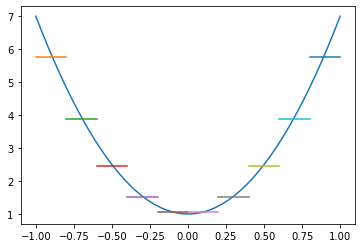

Text(value='1 + 6 * x * x', description='f: ', layout=Layout(height='auto', width='auto'))

Text(value='tau * t + tau * tau', description='k: ', layout=Layout(height='auto', width='auto'))

Text(value='1', description='rhe: ', layout=Layout(height='auto', width='auto'))

IntText(value=-1, description='l: ')

IntText(value=1, description='r: ')

IntText(value=10, description='N: ')

In [8]:
f_text = Text('1 + 6 * x * x', description='f: ', layout=Layout(width='auto', height='auto'))
k_text = Text('tau * t + tau * tau', description='k: ', layout=Layout(width='auto', height='auto'))
rhe_text = Text('1', description='rhe: ', layout=Layout(width='auto', height='auto'))
l_text = IntText('-1', description="l: ")
r_text = IntText('1', description="r: ")
N_text = IntText('10', description="N: ")
def recalculate(_=None):
        with o:
                o.clear_output()
                try:
                        f = lambda x: evaluate(f_text.value, {'x': x})
                        k = lambda tau, t: evaluate(k_text.value, {'t': t, 'tau': tau})
                        rhe = lambda tau: evaluate(rhe_text.value, {'tau': tau})
                        l = int(l_text.value)
                        r = int(r_text.value)
                        N = int(N_text.value)
                        solution = colocation(k, rhe, l, r, N)
                        plot_solution(f, solution, l, r, N)
                        show_inline_matplotlib_plots()
                except Exception:
                        print('Ошибка...')
            
f_text.observe(recalculate, names='value')
k_text.observe(recalculate, names='value')
rhe_text.observe(recalculate, names='value')
l_text.observe(recalculate, names='value')
r_text.observe(recalculate, names='value')
N_text.observe(recalculate, names='value')
recalculate()

display(f_text, k_text, rhe_text, l_text, r_text, N_text)
